# Lab 4

** Reminder: Be sure to DUPLICATE this file, and then rename it "lab4-lastname.ipynb" **

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from astropy.io import fits

# Part 2: Reading files and manipulating data

### 2.1:  try reading data with `pd.read_table()`


In [5]:
file = 'data/2mass_photometry.tbl'

# use this very flexible, handy method to read the file in as a "Data Frame"
df = pd.read_table(file, 
                   delim_whitespace=True, # this setting says use any whitespace as the separator
                   skiprows=40, # some number of rows to skip for the header. Count them up!
                   header=None, # don't automatically assign column names
                   names=('ra', 'dec', 'j','je','js', 'h','he','hs','k','ke','ks','dist','ang'))
# use the names=() to manually assign column names to use!

# let's see what we've read in...
df

,ra,dec,j,je,js,h,he,hs,k,ke,ks,dist,ang
0,133.633972,12.223459,15.326,0.046,0.048,14.738,0.057,0.057,14.716,0.093,0.094,3230.797947,61.761
1,133.539482,12.248091,13.129,0.019,0.023,12.617,0.020,0.022,12.497,0.021,0.023,2988.461592,57.257
2,132.978757,12.185839,15.389,0.046,0.048,14.825,0.055,0.056,14.544,0.063,0.063,1490.817698,21.280
3,133.002980,12.152084,15.924,0.066,0.067,15.201,0.079,0.079,15.073,0.100,0.101,1414.007322,26.294
4,133.177688,12.034407,14.445,0.026,0.029,13.827,0.028,0.030,13.618,0.036,0.037,1501.813382,55.776
5,133.401121,12.043716,14.904,0.035,0.037,14.324,0.034,0.035,14.017,0.038,0.039,2210.845468,66.559
6,133.229101,12.216041,16.561,0.117,0.117,16.010,0.170,0.170,15.523,null,null,2065.906640,43.490
7,133.409045,11.763828,16.074,0.090,0.091,15.738,0.149,0.149,15.284,0.136,0.137,2062.379647,93.560
8,133.353657,11.722830,13.953,0.025,0.028,13.573,0.037,0.038,13.535,0.034,0.035,1883.805119,98.426
9,132.872519,12.263882,16.708,0.124,0.125,15.865,0.145,0.145,15.796,0.197,0.197,1678.335381,5.716


Text(0,0.5,'J Magnitude')

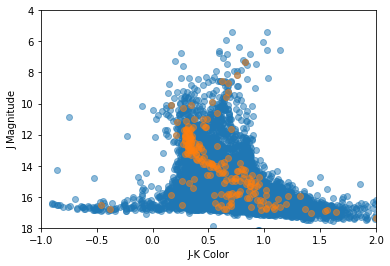

In [37]:
# You can call columns by name, if you add them properly!!

# make the plot, use "alpha" to get some transparency. Fancy...
plt.scatter(df['j']-df['k'], df['j'], alpha=0.5)
plt.ylim(18,4)
plt.xlabel('J-K Color')
plt.xlim(-1,2)
plt.ylabel('J Magnitude')

sort = np.where((df['ra']<=132.85) & (df['ra']>=132.80) & (df['dec']>=11.65) &(df['dec']<=12.05))
plt.scatter(df['j'].values[sort]-df['k'].values[sort], df['j'].values[sort], alpha=0.5)
plt.ylim(18,4)
plt.xlabel('J-K Color')
plt.xlim(-1,2)
plt.ylabel('J Magnitude')

# NOTE: in (stellar) Astronomy, color goes on the X-axis, magnitude on the Y-axis with direction inverted!

**2.3: Read an astronomy image (FITS) file **

I can never remember how to use the astropy fits reader... so look at [the docs](http://docs.astropy.org/en/stable/io/fits/)!

In [17]:
imfile = 'data/m27_halpha1.fits'

# open the flie
hdulist = fits.open(imfile)

# look at the available extensions (HDU's)
hdulist.info()

Filename: data/m27_halpha1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (512, 512)   float32   


In [18]:
data = hdulist[0].data # usually you want the first (sometimes the second) extension
hdulist.close() # be sure to close the file

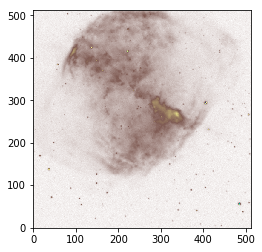

In [21]:
# now show the image!
plt.imshow(np.log10(data), origin='lower', cmap=plt.cm.terrain_r)

# hint: you can make it look better by taking the log of the data!

**2.4: Read a FITS data table**

NOTE: FITS images are really just a special type of FITS tables

In [24]:
dfile = 'data/kplr005780885-2009131105131_llc.fits'
hdulist2 = fits.open(dfile)
hdulist2.info()

Filename: data/kplr005780885-2009131105131_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   476R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (9, 9)   int32   


In [25]:
tbl = hdulist2[1].data
hdulist2.close() # be sure to close it

# Let's look at what Columns are available to be called by name...
tbl.columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E13.6'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; uni

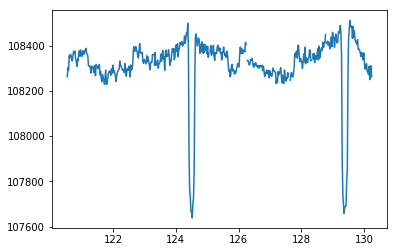

In [30]:
# now make a plot of the light curve!
# can you spot the exoplanet, Kepler-7b?
plt.plot(tbl['TIME'], tbl['PDCSAP_FLUX'])
#plt.xlim(124, 125)

# Part 3: Writing data and plots to files

Now we've read several kinds of data in to Python. Let's practice writing files!

**3.1: Save a plot to a file**

Save that sweet looking planetary nebula image...

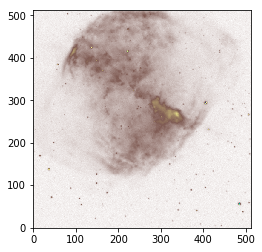

In [48]:
# try saving it both as a .png and a .pdf
plt.imshow(np.log10(data), origin='lower', cmap=plt.cm.terrain_r)
plt.savefig('m27nebula.png', dpi=300, bbox_inches='tight', pad_inches=0.25)
plt.savefig('m27nebula.pdf', dpi=300, bbox_inches='tight', pad_inches=0.25)


# check out more options for the savefig method:
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig

In [34]:
# here are some settings that *I use* when plotting, to make sure things fit on a page correctly:
plt.savefig('myplot.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

**3.2: Save some data to a file**

There are a LOT of ways to save data to a file...
- https://docs.python.org/2/tutorial/inputoutput.html
- FITS via `astropy.io.fits` (good for writing images, or sending data to other astronomers)
- CSV via `pd.DataFrame.to_csv` (awesome if you commit to Pandas)
- save a binary file using `pickle` (fast to re-ingest, but impossible to casually read)
- array to textfile via `np.savetxt` (great for quickly generating a data file)
- manually write a file line-by-line using `open`/`write` (old school, but important!)

Text(0,0.5,'J Magnitude')

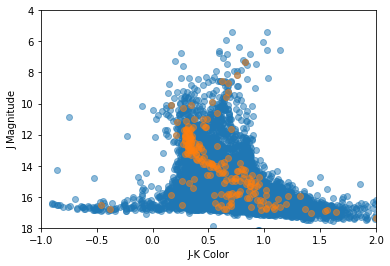

In [39]:
plt.scatter(df['j']-df['k'], df['j'], alpha=0.5)
plt.ylim(18,4)
plt.xlabel('J-K Color')
plt.xlim(-1,2)
plt.ylabel('J Magnitude')


#with 0.25 deg of central point RA=132.825deg, Dec=11.80deg
sort = np.where((df['ra']<=132.85) & (df['ra']>=132.80) & (df['dec']>=11.65) &(df['dec']<=12.05))
plt.scatter(df['j'].values[sort]-df['k'].values[sort], df['j'].values[sort], alpha=0.5)
plt.ylim(18,4)
plt.xlabel('J-K Color')
plt.xlim(-1,2)
plt.ylabel('J Magnitude')

In [41]:
# use any method you choose to save the (ra, dec, J, K) data within 0.25 deg of the field center to a file
# how many lines does your file have?
# header is optional, but useful for Future You (or *me*) to read this file

#jkColor = df['j'].values[sort]-df['k'].values[sort]
#jMag = df['j'].values[sort]

# here's how you might do this manually. Note you need to add New Line characters! Boo...
#ff = open('text.csv', 'w')

#ff.write('HEADER INFO \n')
#for k in range(len(Jdata)):
#    ff.write(str(Jdata[k]) + ',' + str(Kdata[k]) + '\n')
#ff.close()

In [40]:
# here's my favorite: create a NEW dataframe with Pandas!
df_new = pd.DataFrame(data={'j':df['j'].values[sort], 'k':df['k'].values[sort], 'ra':df['ra'].values[sort], 'dec':df['dec'].values[sort]})

df_new.to_csv('mollerupFile.csv')